In [4]:
#Imports
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

Data Defining

Using white wine for training

Using red wine for testing

In [21]:
# Load the CSV file into a Pandas DataFrame
csv_file = './winequality-white.csv'
df = pd.read_csv(csv_file, delimiter=';')

# Print the column names to debug
print("Column names:", df.columns)

# Assuming df is your data frame and 'quality' is the column you want to predict
target = df.pop('quality')
# Convert quality into binary classification (1 for quality >= 6, otherwise 0)
target = target.apply(lambda x: 1 if x >= 6 else 0)

# Convert the DataFrame and the target column to TensorFlow tensors
y_train = tf.convert_to_tensor(target.values, dtype=tf.float32, name='y_train')
X_train = tf.convert_to_tensor(df.values, dtype=tf.float32, name='X_train')

y_train = tf.reshape(y_train, (-1, 1))

print(X_train.shape)
print(y_train.shape)

Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(4898, 11)
(4898, 1)


In [17]:
# Define the logistic regression model
# Define the logistic regression model
class LogisticRegressionModel(tf.Module):
    def __init__(self, input_dim):
        # Initialize weights and bias
        self.weights = tf.Variable(tf.random.normal([input_dim, 1]), dtype=tf.float32)
        self.bias = tf.Variable(tf.zeros([1]), dtype=tf.float32)

    def predict(self, X):
        logits = tf.matmul(X, self.weights) + self.bias
        return tf.sigmoid(logits)

    def loss_fn(self, X, y):
        predictions = self.predict(X)
        return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=predictions, labels=y))

    def compute_gradients(self, X, y):
        with tf.GradientTape() as tape:
            loss = self.loss_fn(X, y)
        gradients = tape.gradient(loss, [self.weights, self.bias])
        return gradients

In [18]:
# Define the training step
def train_step(model, X, y, learning_rate):
    gradients = model.compute_gradients(X, y)
    optimizer = tf.optimizers.SGD(learning_rate)
    optimizer.apply_gradients(zip(gradients, [model.weights, model.bias]))
    return model.loss_fn(X, y)



Epoch 0, Loss: 0.6933463215827942, Learning Rate: 0.01
Epoch 1000, Loss: 0.6933391690254211, Learning Rate: 0.01
Epoch 2000, Loss: 0.6933315396308899, Learning Rate: 0.01
Epoch 3000, Loss: 0.6933236122131348, Learning Rate: 0.01
Epoch 4000, Loss: 0.6933158040046692, Learning Rate: 0.01
Epoch 5000, Loss: 0.6933085322380066, Learning Rate: 0.01
Epoch 6000, Loss: 0.6933020949363708, Learning Rate: 0.01
Epoch 7000, Loss: 0.6932966709136963, Learning Rate: 0.01
Epoch 8000, Loss: 0.6932920813560486, Learning Rate: 0.01
Epoch 9000, Loss: 0.6932883858680725, Learning Rate: 0.01


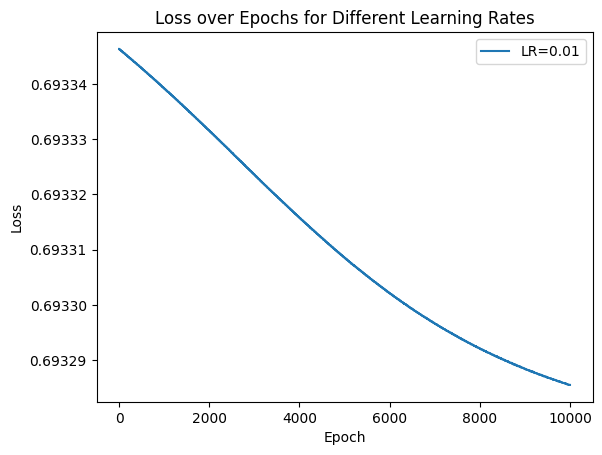

In [19]:
# Training the model
import matplotlib.pyplot as plt

model = LogisticRegressionModel(input_dim=X_train.shape[1])
epochs = 10000
losses = []
best_loss = float('inf')
lr = 0.01
for epoch in range(epochs):
        loss = train_step(model, X_train, y_train, learning_rate=lr)
        losses.append(loss.numpy())
        
        # Monitor gradients
        gradients = model.compute_gradients(X_train, y_train)
        
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}, Learning Rate: {lr}')

if losses[-1] < best_loss:
        best_loss = losses[-1]

plt.plot(losses, label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.show()

In [14]:
# Testing the model
# Load the CSV file into a Pandas DataFrame
csv_file = './winequality-red.csv'
df_test = pd.read_csv(csv_file, delimiter=';')

# Print the column names to debug
print("Column names:", df_test.columns)


# Assuming df is your data frame and 'quality' is the column you want to predict
target_test = df_test.pop('quality')
# Convert quality into binary classification (1 for quality >= 6, otherwise 0)
target_test = target_test.apply(lambda x: 1 if x >= 6 else 0)

# Convert the DataFrame and the target column to TensorFlow tensors
y_test = tf.convert_to_tensor(target_test.values, dtype=tf.float32, name='y_test')
X_test = tf.convert_to_tensor(df_test.values, dtype=tf.float32, name='X_test')

y_test = tf.reshape(y_test, (-1, 1))
y_test_pred = model(X_test)
print("Predictions:", y_test_pred.shape)

# Predict using the trained model (binary output)
y_train_pred = model(X_test)
y_train_pred = tf.round(y_train_pred)  # Convert probabilities to binary outcomes (0 or 1)

# Convert tensors to numpy arrays for metric calculation
y_test_np = y_test.numpy()
y_train_pred_np = y_train_pred.numpy()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_np, y_train_pred_np)
precision = precision_score(y_test_np, y_train_pred_np)
recall = recall_score(y_test_np, y_train_pred_np)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Predictions: (1599, 1)
Accuracy: 0.5347091932457786
Precision: 0.5351043643263758
Recall: 0.9894736842105263
